**Прогнозирование срока выполнения работ**

In [1291]:
#импорт необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  StandardScaler
from sklearn import linear_model, tree
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.dummy import DummyRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder

In [1292]:
#загрузка файла
df = pd.read_csv("data.csv")

1. Рассмотрим датасет 

In [1293]:
df.head().T

,0,1,2,3,4
Наименование королевства,Кэдвен,Темерия,Кэдвен,Кэдвен,Кэдвен
Наименование земли,Приобия,Сутор,Приобия,Приобия,Приобия
Наименование хребта,684,1141,18А.28,9А.18,627
Наименование расщелины,2903,1332,1027,4208,9352
Цель,поиск,поиск,поиск,поиск,поиск
Тип расщелины,наклонная,горизонтальная,наклонная,наклонная,наклонная
Категория расщелины,Нагнетательная,Поисковая,Поисковая,Поисковая,Нагнетательная
Назначение расщелины,Магическое воздействие,NaN,NaN,NaN,Магическое воздействие
Участки,верхнее укрепление+среднее укрепление+основное...,верхнее укрепление+среднее укрепление+основное...,верхнее укрепление+среднее укрепление+основное...,верхнее укрепление+среднее укрепление+основное...,верхнее укрепление+среднее укрепление+основное...
Тип отвилка,Материнский,Материнский,Материнский,Материнский,Материнский


In [1294]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13416 entries, 0 to 13415
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Наименование королевства                    13416 non-null  object 
 1   Наименование земли                          13416 non-null  object 
 2   Наименование хребта                         13416 non-null  object 
 3   Наименование расщелины                      13416 non-null  int64  
 4   Цель                                        13416 non-null  object 
 5   Тип расщелины                               13414 non-null  object 
 6   Категория расщелины                         13416 non-null  object 
 7   Назначение расщелины                        10800 non-null  object 
 8   Участки                                     13416 non-null  object 
 9   Тип отвилка                                 13416 non-null  object 
 10  Технологич

In [1295]:
df.isna().sum()

Наименование королевства                          0
Наименование земли                                0
Наименование хребта                               0
Наименование расщелины                            0
Цель                                              0
Тип расщелины                                     2
Категория расщелины                               0
Назначение расщелины                           2616
Участки                                           0
Тип отвилка                                       0
Технологическая особенность                       0
Статус поиска                                   383
Помощник по контролю поиска                       0
Помощник по поиску                                0
Помощник по наклонным расщелинам                  0
Помощник по зельям                                0
Помощник по долбилам                              0
Помощник по исследованиям                         0
Помощник по укреплению                            0
Помощник по 

Датасет содержит 53 признака, из которых 24 имеют тип данных object. Из общей информации видно, что есть данные о территории исследований, техничских моментах, команде, временных издержках. Также датасет содержит достаточно много пропущенных значений и не все пропуски являются NaN.  
Задание заключается в прогнозировании срока поиска артефакта. Наиболее близкие по смыслу варианты - "Общее время поиска" и разность между "Дата начала поиска" и "Дата окончания поиска".

In [1296]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Наименование расщелины,13416.0,4987.281977,2866.426983,1.00,2535.0000,5048.000,7497.00,9998.00
Количество труб,11680.0,2.628724,1.092514,0.90,1.8000,2.700,3.60,7.20
Количество дополнительных отвилков,13208.0,0.557541,1.476816,0.00,0.0000,0.000,0.00,21.00
Количество пилотных отвилков,13208.0,0.342974,0.824234,0.00,0.0000,0.000,0.00,8.00
Глубина по отвилку,12617.0,3165.736214,651.577145,0.00,2750.4000,3163.500,3661.20,5931.00
Глубина первого отвилка,1470.0,1329.133776,771.236264,0.00,687.6225,1192.050,1471.05,3949.20
Путь поиска в первом отвилке,1539.0,1739.556361,803.000472,36.90,1258.2000,1730.700,2070.90,6412.50
Общее время поиска,13411.0,28.007492,18.445498,0.33,17.3600,24.230,32.85,319.52
Общее время активного поиска,13416.0,23.849386,16.714226,0.30,15.9675,21.400,27.59,635.87
Общее время простоев,11792.0,5.600433,10.324797,0.00,0.8300,2.315,5.89,253.75


In [1297]:
df['Статус поиска'].value_counts()

Статус поиска
завершен      12868
в процессе      165
Name: count, dtype: int64

Статус поиска "завершен" означает, что артефакт найден, если же статус поиска остался в процессе, то значит, что артефакт либо не был найден, либо поиске еще ведутся, следовательно, такие данные не подходят для определения срока поиска артефактов. Также признак "Статус поиска" имеет 383 пропущенных значения. Заполним их на основании признака "Дата завершения поиска". Если дата присутствует, то поиск завершен, иначе - поиск в процессе.

In [1298]:
df['Статус поиска'] = df['Статус поиска'].fillna(df.apply(lambda row: 'в процессе' if pd.isna(row['Дата окончания поиска']) else 'завершен', axis=1))

In [1299]:
df = df[df['Статус поиска'] != 'в процессе']

После очистки данных признак "Статус поиска" принимает только одно значение и неинформативен. По этой причине удалим его.

In [1300]:
df = df.drop('Статус поиска', axis=1)

**Заполнение пропущенных значений и анализ признаков**

In [1301]:
df['Назначение расщелины'].value_counts()

Назначение расщелины
Око Дракона               9804
Магическое воздействие     664
Камень Судеб               128
Неизвестный Артефакт         3
Священная Амброзия           1
Name: count, dtype: int64

Пропущенные значения признака "Назначение расщелины" заполним как "Неизвестный Артефакт"

In [1302]:
df['Назначение расщелины'] = df['Назначение расщелины'].fillna('Неизвестный Артефакт')

Из признаков "Дата окончания поиска" и "Дата начала поиска" сформируем новый "Количество дней". Также исходя из даты поиска можно определить сезон, когда был начат поиск. Сезон в будущем может повлиять на время поиска, поскольку условия зимой гораздо более суровые, чем летом.

In [1303]:
def add_days_difference_column(df, start_date_column, end_date_column, new_column_name):
  df[new_column_name] = (pd.to_datetime(df[end_date_column]) - pd.to_datetime(df[start_date_column])).dt.total_seconds() / (24 * 60 * 60)
  return df
df = round(add_days_difference_column(df, 'Дата начала поиска', 'Дата окончания поиска', 'Количество дней'),2)

In [1304]:
def season(row):
  try:
    start = datetime.strptime(row['Дата начала поиска'], "%Y-%m-%d %H:%M:%S")
    end = datetime.strptime(row['Дата окончания поиска'], "%Y-%m-%d %H:%M:%S")

    # Меняем местами даты, если конец меньше начала
    if end < start:
      start, end =  end, start

    # Определение сезона 
    if 3 <= start.month <= 5: 
      return 2 #весна
    elif 6 <= start.month <= 8:
      return 3 #лето
    elif 9 <= start.month <= 11: 
      return 4  #осень
    else:
      return 1  #зима

  except ValueError:
    return "Неопределенно"
df['Сезон'] = df.apply(season, axis=1)

Проведем подробный анализ целевого признака

In [1305]:
df.describe()[['Общее время поиска', 'Количество дней']]

,Общее время поиска,Количество дней
count,13211.000000,13216.000000
mean,27.993497,32.289824
std,18.458156,25.610848
min,0.330000,-314.830000
25%,17.345000,19.580000
50%,24.230000,27.310000
75%,32.850000,37.380000
max,319.520000,708.080000


Два признака, которые должны быть идентичны между собой имеют достаточную дисперсию. Видно, что признак "количество дней" имеет выбросы и ошибки в данных.

In [1306]:
df[df['Количество дней'] >= 200][['Общее время поиска', 'Общее время активного поиска', 'Общее время простоев', 'Количество дней']]

,Общее время поиска,Общее время активного поиска,Общее время простоев,Количество дней
522,61.05,32.38,37.49,258.25
729,34.11,52.10,0.45,685.04
1439,196.68,157.05,13.81,219.67
1637,261.90,156.85,53.40,292.00
1834,194.94,193.60,1.34,216.60
2112,295.22,293.07,2.15,327.02
2821,220.62,136.39,84.11,244.12
3906,180.69,174.55,6.15,200.77
4541,294.32,174.65,119.66,327.02
6719,158.65,88.16,131.68,242.39


Из выведенных строк датасета видно, что есть значения, где общее время поиска меньше суммы "Общее время активного поиска" и "Общее время простоев". Заменим их суммой.

In [1307]:
# Условие 1: "Общее время простоев" NaN
df.loc[df["Общее время простоев"].isna() & (df["Общее время поиска"] < df["Общее время активного поиска"]), "Общее время поиска"] = df["Общее время активного поиска"]

# Условие 2: "Общее время простоев" непустое
df.loc[~df["Общее время простоев"].isna() & (df["Общее время поиска"] < df["Общее время активного поиска"] + df["Общее время простоев"]), "Общее время поиска"] = df["Общее время активного поиска"] + df["Общее время простоев"]

Отрицательные значения в "Количество дней" заменим на значения из "Общее время поиска"

In [1308]:
df.loc[df["Количество дней"] < 0, "Количество дней"] = df["Общее время поиска"]

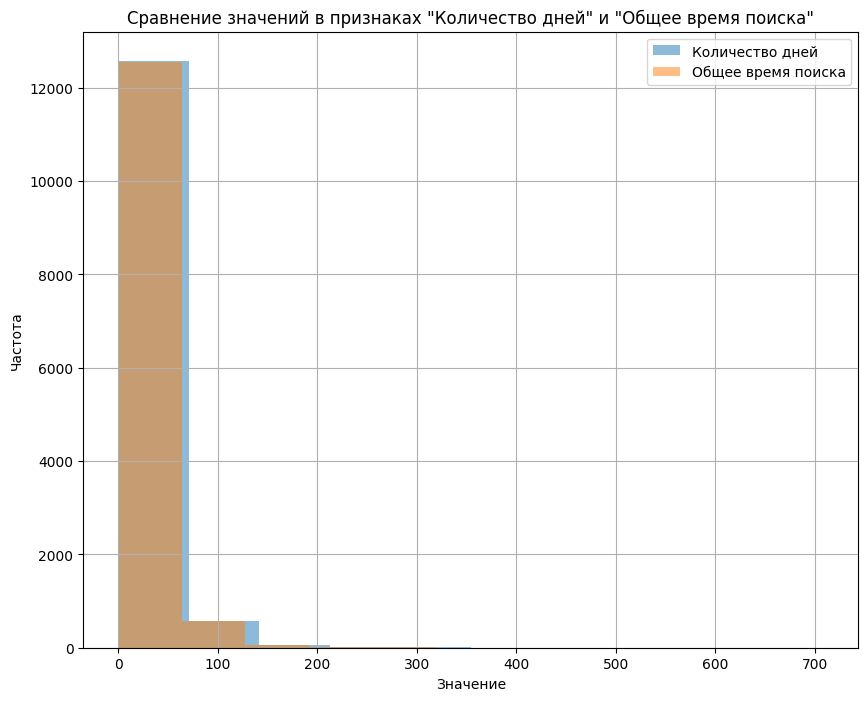

In [1309]:
plt.figure(figsize=(10, 8))
plt.hist(df['Количество дней'], label='Количество дней', alpha=0.5)
plt.hist(df['Общее время поиска'], label='Общее время поиска', alpha=0.5)
plt.legend()
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.title('Сравнение значений в признаках "Количество дней" и "Общее время поиска"')
plt.grid()
plt.show()

Данные имет одинаковое распределение, однако значения больше у признака "Количество дней"

In [1310]:
pivot_table = pd.pivot_table(df, values='Количество дней', index='Сезон', aggfunc='median')
print(pivot_table)

       Количество дней
Сезон                 
1               30.215
2               26.210
3               25.790
4               27.750


При сранение времени поиска в разные сезоны видно, что наибольшее медианное время - зимой, наименьшее - летом. Гипотеза подтвердилась и признак действительно может быть полезен при построении модели. Удалим из датасета дату начала поиска и дату окончания поиска, поскольку всю информацию из этих признаков теперь содержат признаки "Количество дней" и "Сезон"

In [1311]:
df = df.drop('Дата окончания поиска', axis=1)
df = df.drop('Дата начала поиска', axis=1)

Text(0.5, 1.0, 'Количество дней')

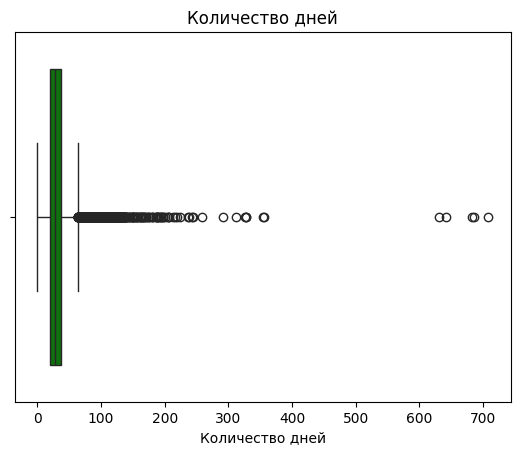

In [1312]:
plt.figure()
sns.boxplot(data = df['Количество дней'], orient = 'h', color = 'green')
plt.title("Количество дней")

Text(0.5, 1.0, 'Общее время поиска')

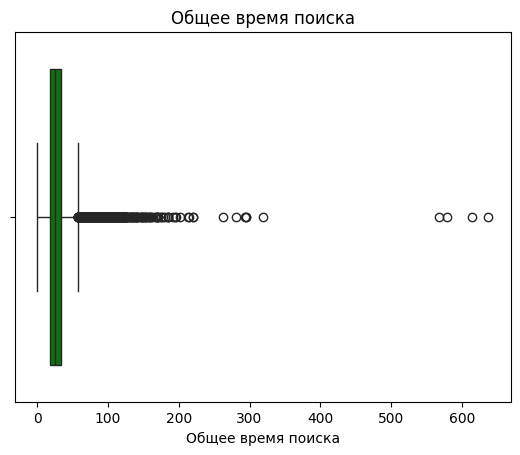

In [1313]:
plt.figure()
sns.boxplot(data = df['Общее время поиска'], orient = 'h', color = 'green')
plt.title("Общее время поиска")

In [1314]:
df = df[(df['Общее время поиска'] <= 200) & (df['Количество дней'] <=200) ]

array([[<Axes: title={'center': 'Наименование расщелины'}>,
        <Axes: title={'center': 'Количество труб'}>,
        <Axes: title={'center': 'Количество дополнительных отвилков'}>,
        <Axes: title={'center': 'Количество пилотных отвилков'}>,
        <Axes: title={'center': 'Глубина по отвилку'}>,
        <Axes: title={'center': 'Глубина первого отвилка'}>],
       [<Axes: title={'center': 'Путь поиска в первом отвилке'}>,
        <Axes: title={'center': 'Общее время поиска'}>,
        <Axes: title={'center': 'Общее время активного поиска'}>,
        <Axes: title={'center': 'Общее время простоев'}>,
        <Axes: title={'center': 'Количество аварий'}>,
        <Axes: title={'center': 'Количество брака'}>],
       [<Axes: title={'center': 'Количество геологических осложнений'}>,
        <Axes: title={'center': 'Количество осложнений'}>,
        <Axes: title={'center': 'Количество простоев по метеоусловиям'}>,
        <Axes: title={'center': 'Количество простоев'}>,
        <Axe

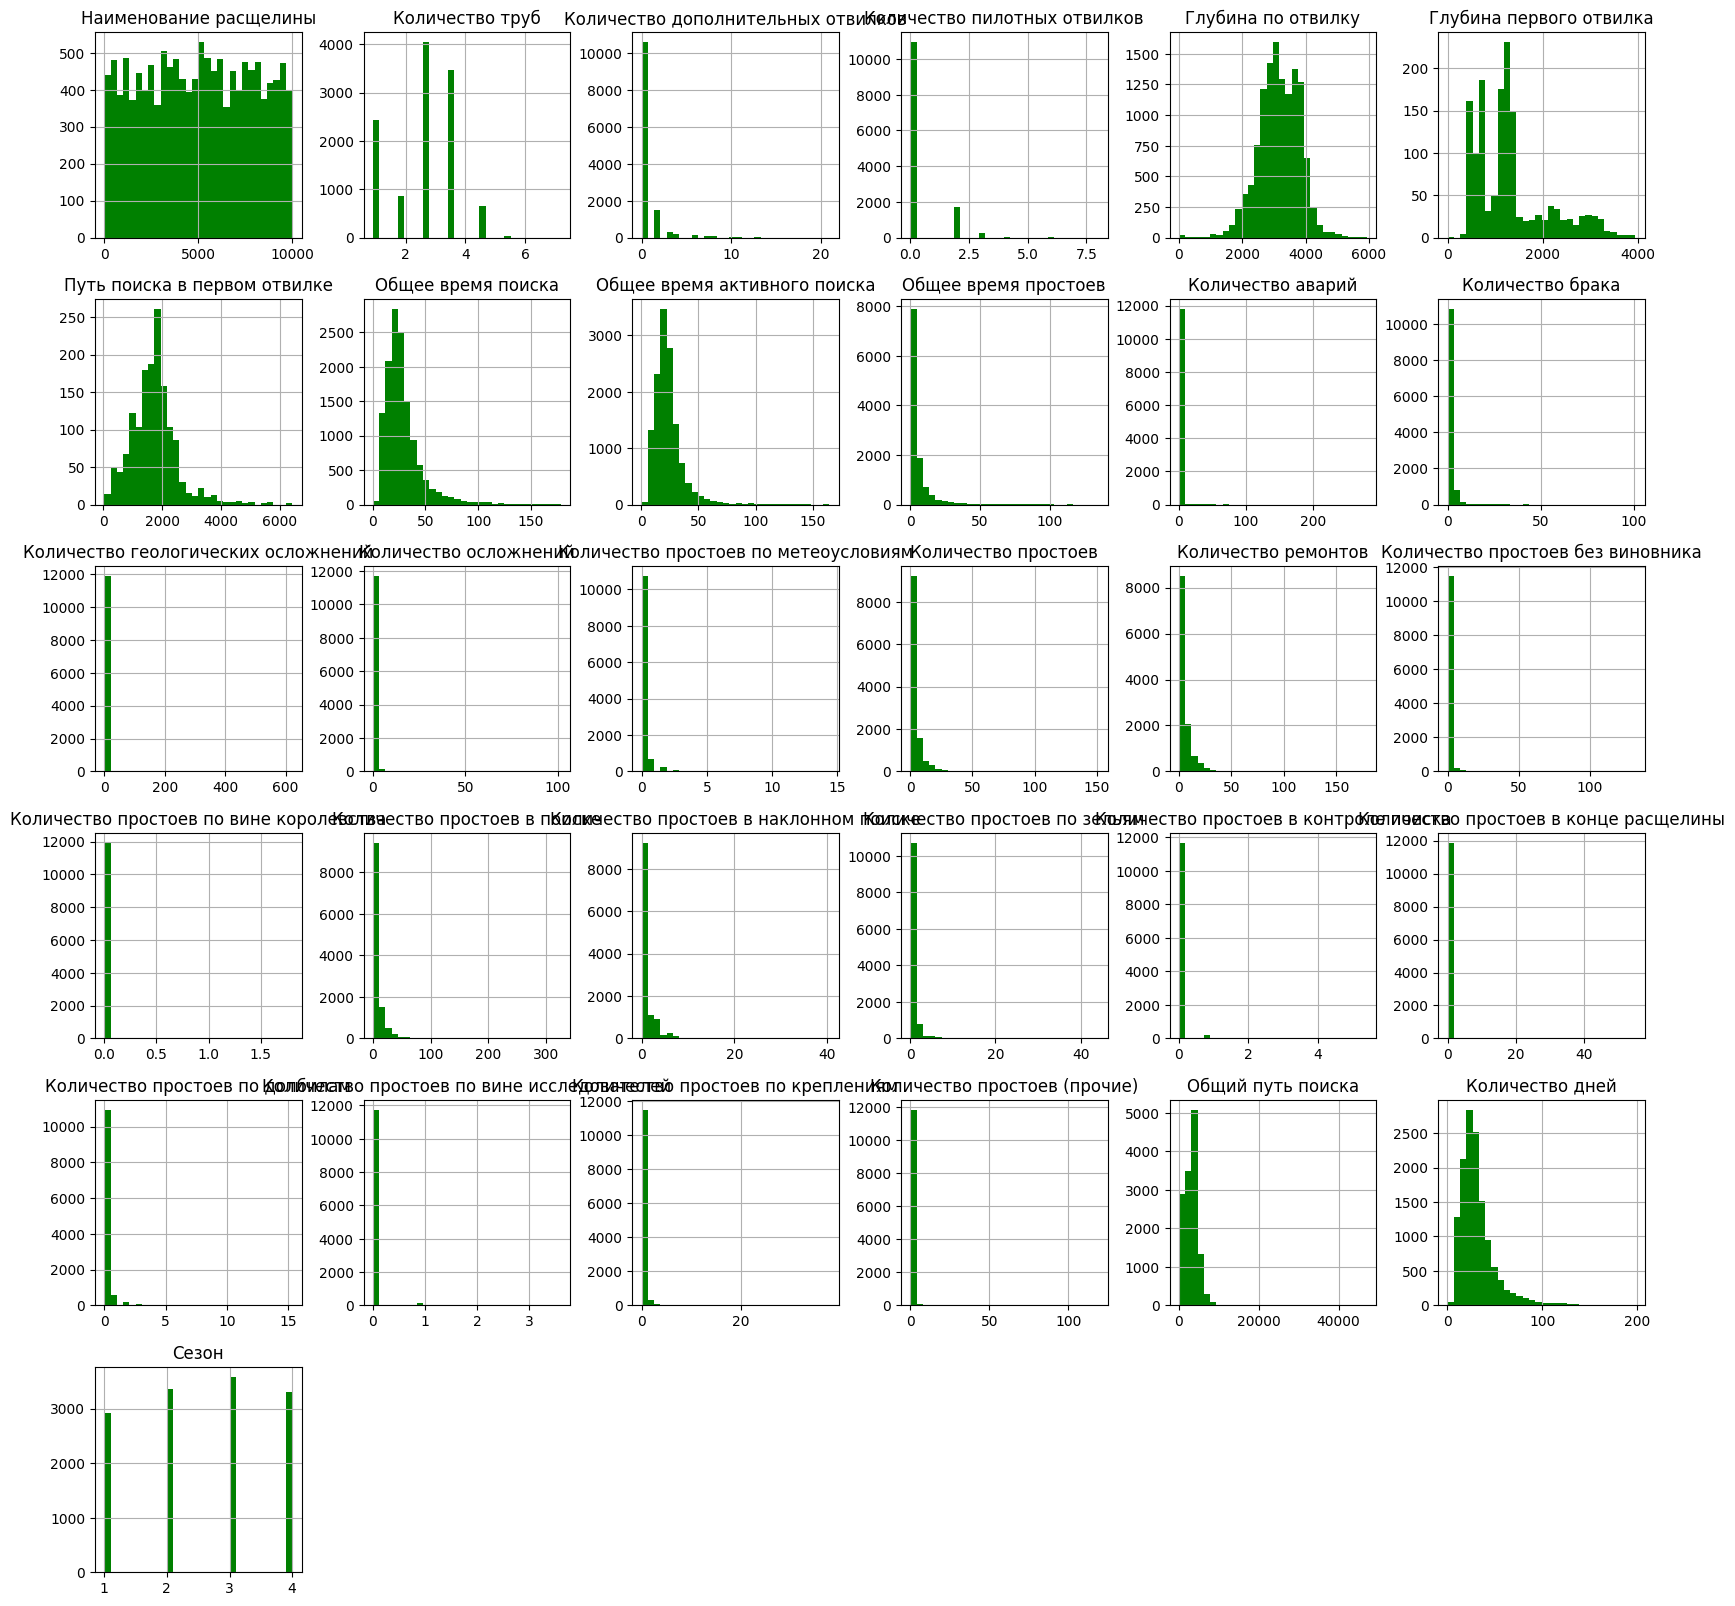

In [1315]:
df.hist(figsize=(20, 20), bins = 30, color ='g')

**Признаки для обучения модели**

Ранее при выводе первых 5 строк датасета было замечено, что имеются пустые строки, прежде всего в признаках о помощниках. Вероятнее всего, значения там пропущены неслучайно и отсутствие значения указывает на то, что помощник по этому профилю отсутствовал в конкретном походе. Однако для более комфортной обработки датасета и понимания о количестве информативных значений заполним пустые ячейки NaN.

In [1316]:
df=df.replace(r'^\s*$', np.nan, regex=True)

In [1317]:
df.isna().sum()

Наименование королевства                          0
Наименование земли                                0
Наименование хребта                               0
Наименование расщелины                            0
Цель                                              0
Тип расщелины                                     2
Категория расщелины                               0
Назначение расщелины                              0
Участки                                        1696
Тип отвилка                                     205
Технологическая особенность                       2
Помощник по контролю поиска                     669
Помощник по поиску                              333
Помощник по наклонным расщелинам                587
Помощник по зельям                              568
Помощник по долбилам                            660
Помощник по исследованиям                      1361
Помощник по укреплению                         1790
Помощник по огненным заклятиям                 5105
Помощник по 

Рассмотрим признак "Технологическая особенность"

In [1318]:
df['Технологическая особенность'].value_counts()

Технологическая особенность
горизонтальная                                             4191
горизонтальная + комбинированное магическое воздействие    2416
наклонная                                                  2074
горизонтальная + пилотов 20                                 695
горизонтальная + отвилков 40                                598
                                                           ... 
многощельная + отвилков 260                                   1
горизонтальная + отвилков 120 + пилотов 80                    1
горизонтальная + отвилков 80 + магическое воздействие         1
многощельная + отвилков 140 + пилотов 80                      1
горизонтальная + отвилков 160                                 1
Name: count, Length: 146, dtype: int64

Признак имеет большое количество уникальных значений со схожей структурой: тип расщелины + кол-во отвилков + кол-вл пилотов + воздействие. В таком формате его неудобно использовать - создадим на основе его новые признаки - отвилков и пилотов. Сам признак удалим после извлечения из него информации 

In [1319]:
keywords = [
  'отвилков', 'пилотов'
]
for keyword in keywords:
  df[keyword.replace(' ', '_')] = df['Технологическая особенность'].str.contains(keyword).fillna(0).astype(int)
df['отвилков'] = df['Технологическая особенность'].str.extract(r'отвилков (\d+)').fillna(0).astype(int)
df['пилотов'] = df['Технологическая особенность'].str.extract(r'пилотов (\d+)').fillna(0).astype(int)
#Исходный признак удаляем
df.drop('Технологическая особенность', axis=1, inplace=True)

In [1320]:
df['Участки'].value_counts()

Участки
верхнее укрепление+среднее укрепление+основное укрепление                           2656
верхнее укрепление+среднее укрепление+основное укрепление+тупик                     2643
тупик                                                                               2248
среднее укрепление+основное укрепление+тупик                                         600
верхнее укрепление+среднее укрепление+пилот+основное укрепление+тупик                576
                                                                                    ... 
верхнее укрепление+пилот+среднее укрепление+основное укрепление+тупик                  1
среднее укреплениесреднее укрепление                                                   1
верхнее укрепление+среднее укрепление+среднее укреплениесреднее укрепление+тупик       1
среднее укрепление+основное укрепление+тупик+пилот                                     1
среднее укрепление+изоляция+основное укрепление+тупик+тупик                            1
Name: count, 

Признак "Участки" содержит большое количество уникальных категориальных значений, поэтому его ннецелесообразно использовать для обучения. Создадим отдельные столбцы датафрейма для подсчета различных типов укреплений и тупиков, которые заменят исходный признак "Участки".

In [1321]:
df['Верхнее'] = df['Участки'].str.contains('верхнее укрепление').fillna(0).astype(int)
df['Среднее'] = df['Участки'].str.contains('среднее укрепление').fillna(0).astype(int)
df['Основное'] = df['Участки'].str.contains('основное укрепление').fillna(0).astype(int)
df['Тупик'] = df['Участки'].str.contains('тупик').fillna(0).astype(int)
df['Пилот'] = df['Участки'].str.contains('пилот').fillna(0).astype(int)
df['Открытая_расщелина'] = df['Участки'].str.contains('открытая расщелина').fillna(0).astype(int)
df['Изоляция'] = df['Участки'].str.contains('изоляция').fillna(0).astype(int)
# Удаляем исходный признак "Участки"
df.drop('Участки', axis=1, inplace=True)

<Axes: >

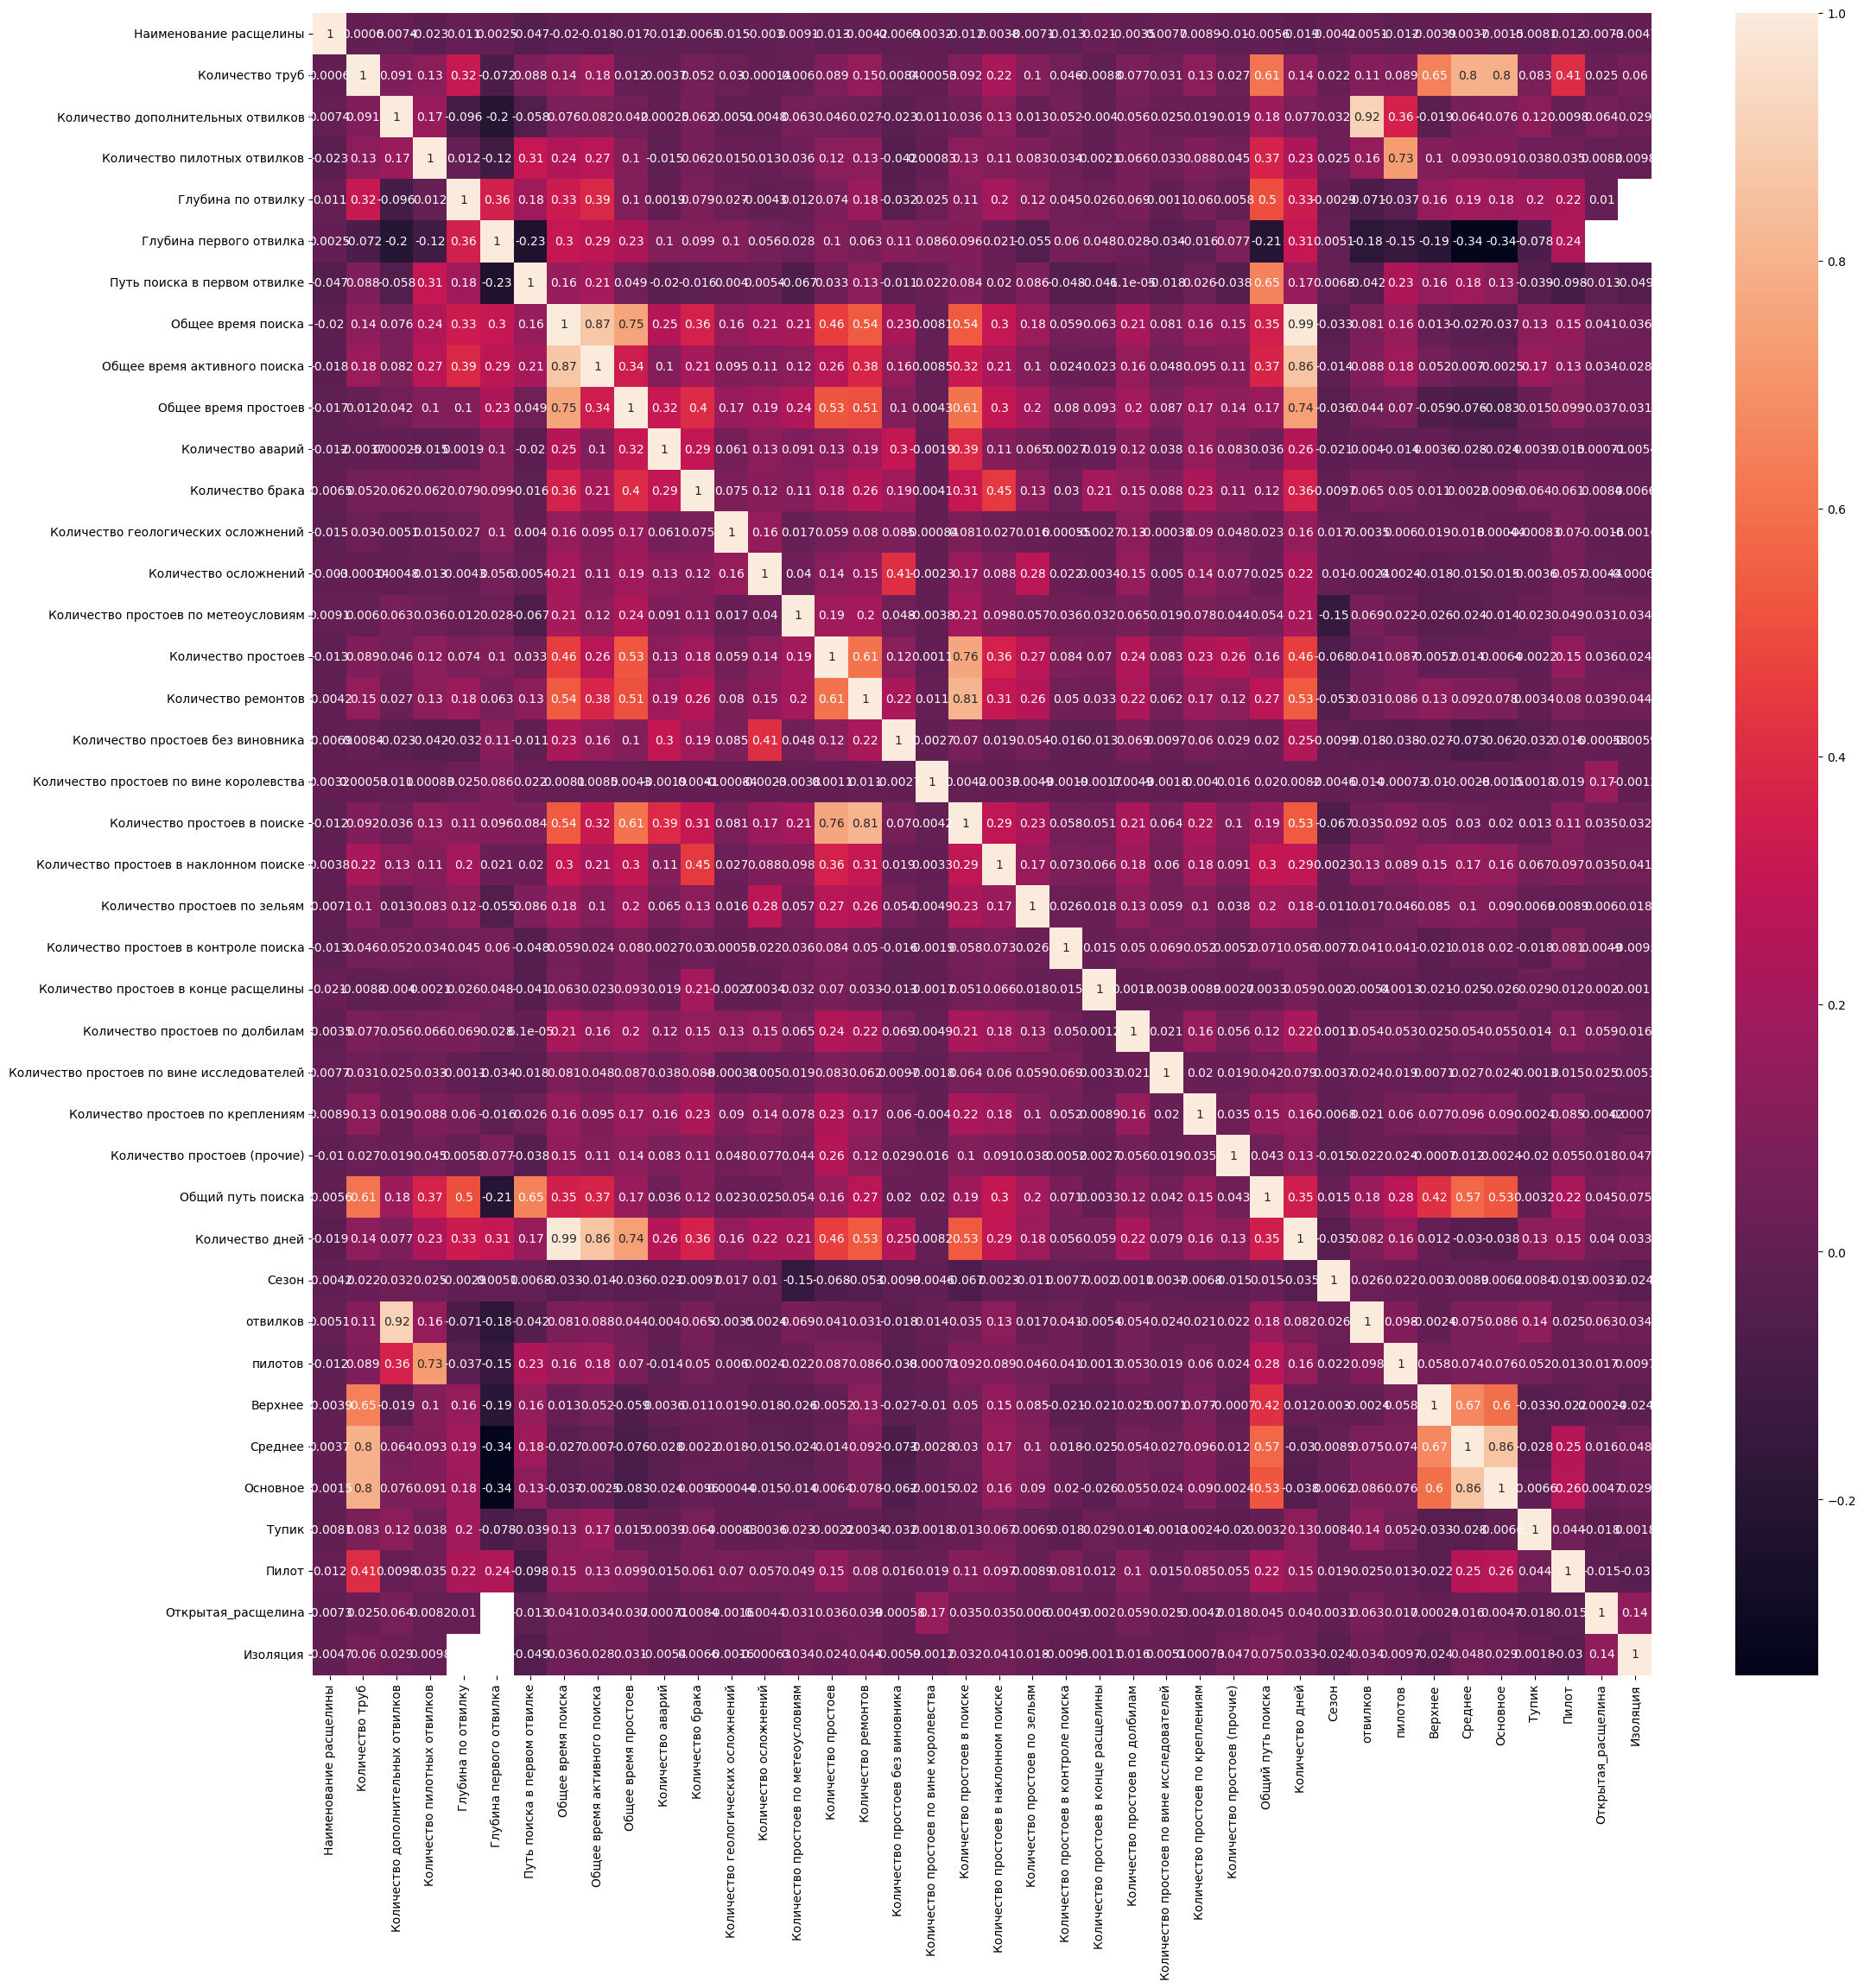

In [1322]:
df_count = df.select_dtypes(['float', 'int'])
df_count_matrix = df_count.corr()
plt.figure(figsize=(25,25))
sns.heatmap(df_count_matrix, annot = True)

В исходном датафрейме есть признаки "Количество пилотных отвилков", "Количество дополнительных отвилков", которые вероятнее всего совпадают с данными, полученными из столбца "Технологическая особенность". Проверим это предположение:

In [1323]:
df.groupby(by = 'Количество пилотных отвилков', as_index= False)[['Количество пилотных отвилков', 'пилотов']].agg('median')

,Количество пилотных отвилков,пилотов
0,0.0,0.0
1,2.0,20.0
2,3.0,40.0
3,4.0,60.0
4,6.0,80.0
5,7.0,100.0
6,8.0,120.0


Видно, что данные имеют явную зависимость (о чем свидетельствует корреляция 0.73), однако данные "Количество пилотных отвилков" отмасштабированы, соответственно заполнять пустые значения этого столбца необходимо также масштабированными значениями.

In [1324]:
correspondence = {
  0.0: 0.0,
  20.0: 2.0,
  40.0: 3.0,
  60.0: 4.0,
  80.0: 6.0,
  100.0: 7.0,
  120.0: 8.0
}
df['Количество пилотных отвилков'] = df['Количество пилотных отвилков'].fillna(df['пилотов'].map(correspondence))
#признак "пилотов" удаляем, поскольку он дублирует информацию
df.drop('пилотов', axis=1, inplace=True)

Аналогично заполняем пропущенные значения в признаке 'Количество дополнительных отвилков' (корреляция с 'отвилков' 0.92)

In [1325]:
df.groupby(by = 'Количество дополнительных отвилков', as_index= False)[['Количество дополнительных отвилков', 'отвилков']].agg('mean')

,Количество дополнительных отвилков,отвилков
0,0.0,0.0
1,2.0,40.0
2,3.0,60.0
3,4.0,80.0
4,6.0,0.0
5,7.0,120.0
6,8.0,140.0
7,10.0,160.0
8,11.0,180.0
9,12.0,200.0


In [1326]:
correspondence = {
  0.0: 0.0,
  40.0: 2.0,
  60.0: 3.0,
  80.0: 4.0,
  100.0: 6.0,
  120.0: 7.0,
  140.0: 8.0,
  160.0: 10.0,
  180.0: 11.0,
  200.0: 12.0,
  220.0: 13.0,
  240.0:15.0,
  260.0:16.0,
  280.0: 17.0,
  340.0: 21.0
}
df['Количество дополнительных отвилков'] = df['Количество дополнительных отвилков'].fillna(df['отвилков'].map(correspondence))
#признак "отвилков" удаляем, поскольку он дублирует информацию
df.drop('отвилков', axis=1, inplace=True)

Рассмотрим как зависит тип отвилка от количество дополнительных и пилотных отвилков, а также цели

In [1327]:
df.groupby(by = 'Тип отвилка')[['Количество пилотных отвилков', 'Количество дополнительных отвилков']].agg('median')

,Количество пилотных отвилков,Количество дополнительных отвилков
Тип отвилка,,
Боковой,0.0,0.0
Боковой; Дополнительный,0.0,2.0
Боковой; Дополнительный; Пилотный,2.0,2.0
Боковой; Пилотный,2.0,0.0
Дополнительный,0.0,2.0
Дополнительный; Материнский,0.0,2.0
Дополнительный; Материнский; Пилотный,2.0,2.0
Дополнительный; Пилотный,2.0,4.0
Материнский,0.0,0.0


In [1328]:
df.groupby(['Тип отвилка', 'Цель']).size().unstack()

Цель,боковой отвилок,поиск,разведка
Тип отвилка,,,
Боковой,2849.0,1.0,NaN
Боковой; Дополнительный,74.0,NaN,NaN
Боковой; Дополнительный; Пилотный,2.0,NaN,NaN
Боковой; Пилотный,169.0,NaN,NaN
Дополнительный,56.0,294.0,2.0
Дополнительный; Материнский,NaN,645.0,1.0
Дополнительный; Материнский; Пилотный,NaN,150.0,NaN
Дополнительный; Пилотный,NaN,1.0,NaN
Материнский,1.0,7623.0,96.0


На основании этих таблиц заполним пустые значения в признаке "Тип отвилка"

In [1329]:
def determine_branch_type(row):
    if pd.isna(row['Тип отвилка']):
        if row['Цель'] == 'боковой отвилок':
            if row['Количество пилотных отвилков'] > 0 and row['Количество дополнительных отвилков'] > 0:
                return 'Боковой; Дополнительный; Пилотный'
            elif row['Количество пилотных отвилков'] == 0 and row['Количество дополнительных отвилков'] > 0:
                return 'Боковой; Дополнительный'
            elif row['Количество пилотных отвилков'] > 0 and row['Количество дополнительных отвилков'] == 0:
                return 'Боковой; Пилотный'
            elif row['Количество пилотных отвилков'] == 0 and row['Количество дополнительных отвилков'] == 0:
                return 'Боковой'
        else:  # Если "Цель" не "боковой отвилок"
            if row['Количество пилотных отвилков'] > 0 and row['Количество дополнительных отвилков'] > 0:
                return 'Дополнительный; Материнский; Пилотный'
            elif row['Количество пилотных отвилков'] == 0 and row['Количество дополнительных отвилков'] > 0:
                return 'Дополнительный; Материнский'
            elif row['Количество пилотных отвилков'] > 0 and row['Количество дополнительных отвилков'] == 0:
                return 'Материнский; Пилотный'
            elif row['Количество пилотных отвилков'] == 0 and row['Количество дополнительных отвилков'] == 0:
                return 'Материнский'
    return row['Тип отвилка']
df['Тип отвилка'] = df.apply(determine_branch_type, axis=1)

Рассмотрим влияние типа отвилка на параметры "Глубина по отвилку", "Количество труб"

In [1330]:
df.groupby(by = 'Тип отвилка')[['Глубина по отвилку', 'Глубина первого отвилка', 'Количество труб', 'Путь поиска в первом отвилке']].agg('median')

,Глубина по отвилку,Глубина первого отвилка,Количество труб,Путь поиска в первом отвилке
Тип отвилка,,,,
Боковой,2974.23,2062.80,0.9,712.80
Боковой; Дополнительный,2529.45,1918.80,0.9,585.00
Боковой; Дополнительный; Пилотный,3170.70,2169.00,1.8,575.10
Боковой; Пилотный,3208.05,2214.00,0.9,1035.90
Дополнительный,2983.50,675.00,2.7,1755.90
Дополнительный; Материнский,3330.00,678.60,3.6,1660.50
Дополнительный; Материнский; Пилотный,3395.61,920.70,3.6,1618.20
Дополнительный; Пилотный,3528.00,1343.70,3.6,1492.20
Материнский,3329.55,1085.85,2.7,1772.10


Из сводной таблицы видно, что зависимость имеется, заполним пустые значения на основании этой таблицы.

In [1331]:
fork_dict = df.groupby(by = 'Тип отвилка')['Глубина по отвилку'].agg('median').to_dict()
df['Глубина по отвилку'] = df['Глубина по отвилку'].fillna(df['Тип отвилка'].map(fork_dict))

In [1332]:
pipes_dict = df.groupby(by = 'Тип отвилка')['Количество труб'].agg('median').to_dict()
df['Количество труб'] = df['Количество труб'].fillna(df['Тип отвилка'].map(pipes_dict))

На основании информации о помощниках создадим новый признак - количество помощников

In [1333]:
#Создание нового столбца датафрейма
assistants =['Помощник по контролю поиска', 'Помощник по поиску',
       'Помощник по наклонным расщелинам', 'Помощник по зельям',
       'Помощник по долбилам', 'Помощник по исследованиям',
       'Помощник по укреплению', 'Помощник по огненным заклятиям',
       'Помощник по подвескам', 'Помощник по вырезке окна']
df['Количество помощников'] = df.apply(lambda row: sum([1 if not pd.isna(row[col]) else 0 for col in assistants]), axis=1)

In [1334]:
df.isna().sum()

Наименование королевства                          0
Наименование земли                                0
Наименование хребта                               0
Наименование расщелины                            0
Цель                                              0
Тип расщелины                                     2
Категория расщелины                               0
Назначение расщелины                              0
Тип отвилка                                       0
Помощник по контролю поиска                     669
Помощник по поиску                              333
Помощник по наклонным расщелинам                587
Помощник по зельям                              568
Помощник по долбилам                            660
Помощник по исследованиям                      1361
Помощник по укреплению                         1790
Помощник по огненным заклятиям                 5105
Помощник по подвескам                          7155
Помощник по вырезке окна                      11642
Тип инструме

In [1335]:
len(df['Тип инструмента'].unique())

57

In [1336]:
len(df['Помощник по вырезке окна'].unique())

24

In [1337]:
len(df['Помощник по подвескам'].unique())

117

In [1338]:
len(df['Помощник по огненным заклятиям'].unique())

79

Удалим признаки "Тип инструмента", "Помощник по вырезке окна", "Помощник по подвескам", "Помощник по огненным заклятиям" из-за большого количества пропусков и уникальных значений.

In [1339]:
df = df.drop('Помощник по огненным заклятиям', axis=1)
df = df.drop('Помощник по подвескам', axis=1)
df = df.drop('Помощник по вырезке окна', axis=1)
df = df.drop('Тип инструмента', axis=1)

Рассмотрим есть ли в датасете зависимость между тем, какая компания является помощников по поиску и количеством простоев по поиску

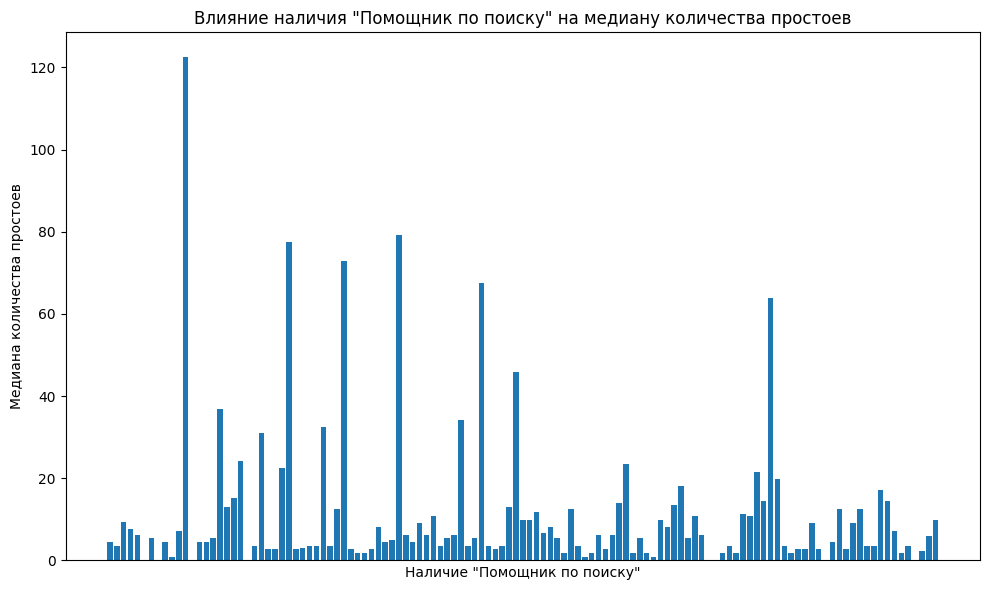

In [1340]:
grouped_df = df.groupby(by='Помощник по поиску', as_index=False)[['Количество простоев в поиске']].agg('median')
plt.figure(figsize=(10, 6)) 
plt.bar(grouped_df['Помощник по поиску'], grouped_df['Количество простоев в поиске']) 
plt.xlabel('Наличие "Помощник по поиску"') 
plt.ylabel('Медиана количества простоев') 
plt.title('Влияние наличия "Помощник по поиску" на медиану количества простоев') 
plt.xticks([])
plt.tight_layout()
plt.show()

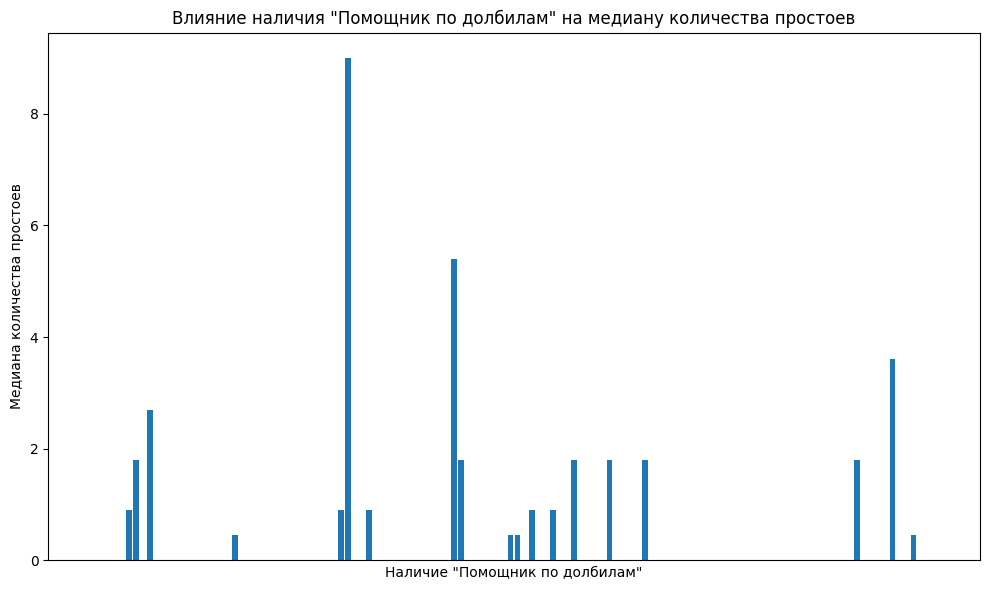

In [1341]:
grouped_df = df.groupby(by='Помощник по долбилам', as_index=False)[['Количество простоев по долбилам']].agg('median')
plt.figure(figsize=(10, 6)) 
plt.bar(grouped_df['Помощник по долбилам'], grouped_df['Количество простоев по долбилам']) 
plt.xlabel('Наличие "Помощник по долбилам"') 
plt.ylabel('Медиана количества простоев') 
plt.title('Влияние наличия "Помощник по долбилам" на медиану количества простоев') 
plt.xticks([])
plt.tight_layout()
plt.show()

На основании информации о помощниках заполним пропуски о простоях, с которыми они связаны

In [1342]:
columns_to_fill = [ ('Количество простоев в поиске', 'Помощник по поиску'),
 ('Количество простоев в контроле поиска', 'Помощник по контролю поиска'),
 ('Количество простоев в наклонном поиске', 'Помощник по наклонным расщелинам'),
 ('Количество простоев по зельям', 'Помощник по зельям'),
 ('Количество простоев по долбилам', 'Помощник по долбилам'),
 ('Количество простоев по вине исследователей', 'Помощник по исследованиям'),
 ('Количество простоев по креплениям', 'Помощник по укреплению'),
]

for column_name, helper_column_name in columns_to_fill:
 # Заполняем пропущенные значения в helper_column_name
 df[helper_column_name] = df[helper_column_name].fillna('отсутствует')

 # Вычисляем медиану по группам helper_column_name
 helper_dict = df.groupby(by=helper_column_name)[column_name].agg('median').to_dict()

 # Заполняем пропущенные значения в column_name медианой по группам
 df[column_name] = df[column_name].fillna(df[helper_column_name].map(helper_dict))

 # Заполняем оставшиеся пропущенные значения медианой по всем данным
 df[column_name] = df[column_name].fillna(df[column_name].median())

Удалим информацию о помощниках после заполнения, поскольку эти данные содержат очень много уникальных категориальных значений

In [1343]:
columns_to_drop = ['Помощник по контролю поиска', 'Помощник по поиску',
       'Помощник по наклонным расщелинам', 'Помощник по зельям',
       'Помощник по долбилам', 'Помощник по исследованиям',
       'Помощник по укреплению']
for column in columns_to_drop:
  df = df.drop(column, axis=1)

Рассмотрим оставшиеся значения

In [1344]:
print('Медианное значение', df['Количество осложнений'].median())
df['Количество осложнений'].value_counts()

Медианное значение 0.0


Количество осложнений
0.0      10331
0.9        965
1.8        302
2.7        110
3.6         47
4.5         33
5.4         27
6.3         20
8.1         16
9.9          8
7.2          8
12.6         6
10.8         6
14.4         5
9.0          4
13.5         4
11.7         4
26.1         3
35.1         3
19.8         2
16.2         2
23.4         1
15.3         1
21.6         1
22.5         1
27.0         1
60.3         1
45.0         1
87.3         1
39.6         1
24.3         1
101.7        1
20.7         1
41.4         1
18.0         1
42.3         1
18.9         1
Name: count, dtype: int64

In [1345]:
print('Медианное значение', df['Количество простоев без виновника'].median())
df['Количество простоев без виновника'].value_counts()

Медианное значение 0.0


Количество простоев без виновника
0.0      10392
0.9        591
1.8        242
2.7        150
3.6         93
4.5         58
5.4         56
6.3         47
7.2         31
9.0         27
10.8        23
8.1         21
9.9         19
13.5        19
11.7        15
12.6        13
19.8        11
17.1         9
25.2         9
16.2         7
14.4         7
18.0         7
18.9         6
20.7         5
15.3         5
28.8         4
23.4         4
21.6         4
30.6         3
51.3         3
27.9         3
26.1         3
22.5         3
29.7         3
27.0         3
32.4         2
39.6         2
36.0         2
53.1         2
67.5         2
56.7         2
31.5         2
24.3         2
61.2         1
47.7         1
37.8         1
40.5         1
65.7         1
33.3         1
106.2        1
132.3        1
35.1         1
49.5         1
38.7         1
118.8        1
34.2         1
71.1         1
42.3         1
62.1         1
55.8         1
Name: count, dtype: int64

In [1346]:
print('Медианное значение', df['Количество геологических осложнений'].median())
df['Количество геологических осложнений'].value_counts()

Медианное значение 0.0


Количество геологических осложнений
0.0      10852
0.9        583
1.8        190
2.7         86
3.6         34
4.5         29
5.4         27
9.9         12
9.0         12
6.3         10
8.1         10
7.2          8
11.7         6
13.5         4
25.2         4
18.9         3
10.8         3
36.0         2
21.6         2
17.1         2
30.6         2
12.6         2
15.3         2
31.5         2
19.8         2
16.2         2
26.1         2
20.7         2
24.3         2
27.9         1
104.4        1
41.4         1
44.1         1
72.9         1
153.9        1
118.8        1
212.4        1
62.1         1
28.8         1
32.4         1
388.8        1
54.9         1
115.2        1
45.0         1
61.2         1
133.2        1
94.5         1
451.8        1
621.9        1
46.8         1
18.0         1
14.4         1
43.2         1
34.2         1
Name: count, dtype: int64

In [1347]:
print('Медианное значение', df['Количество простоев по метеоусловиям'].median())
df['Количество простоев по метеоусловиям'].value_counts()

Медианное значение 0.0


Количество простоев по метеоусловиям
0.0     10745
0.9       702
1.8       242
2.7       105
3.6        52
4.5        27
5.4        17
6.3        15
7.2         9
9.0         3
8.1         2
11.7        1
14.4        1
9.9         1
Name: count, dtype: int64

In [1348]:
print('Медианное значение', df['Количество простоев (прочие)'].median())
df['Количество простоев (прочие)'].value_counts()

Медианное значение 0.0


Количество простоев (прочие)
0.0      10595
0.9        870
1.8        244
2.7         91
3.6         37
4.5         27
5.4         16
6.3         13
7.2          7
9.9          4
13.5         4
8.1          3
10.8         3
9.0          3
12.6         2
118.8        1
14.4         1
18.9         1
25.2         1
11.7         1
20.7         1
66.6         1
30.6         1
16.2         1
15.3         1
Name: count, dtype: int64

In [1349]:
print('Медианное значение', df['Количество простоев по вине королевства'].median())
df['Количество простоев по вине королевства'].value_counts()

Медианное значение 0.0


Количество простоев по вине королевства
0.0    11926
1.8        2
0.9        1
Name: count, dtype: int64

In [1350]:
print('Медианное значение', df['Количество аварий'].median())
df['Количество аварий'].value_counts()

Медианное значение 0.0


Количество аварий
0.0      9985
0.9      1195
1.8       299
2.7       120
3.6        77
4.5        43
5.4        27
9.0        17
7.2        15
6.3        14
12.6       10
16.2        9
9.9         8
11.7        8
8.1         7
15.3        7
14.4        7
18.9        5
13.5        4
10.8        4
21.6        4
36.9        3
22.5        3
20.7        3
37.8        3
23.4        3
19.8        3
28.8        2
25.2        2
35.1        2
33.3        2
24.3        2
71.1        2
29.7        2
30.6        2
27.9        2
26.1        2
36.0        1
280.8       1
96.3        1
82.8        1
49.5        1
81.9        1
34.2        1
60.3        1
50.4        1
39.6        1
42.3        1
68.4        1
46.8        1
92.7        1
38.7        1
66.6        1
51.3        1
17.1        1
120.6       1
Name: count, dtype: int64

In [1351]:
print('Медианное значение', df['Количество простоев без виновника'].median())
df['Количество простоев без виновника'].value_counts()

Медианное значение 0.0


Количество простоев без виновника
0.0      10392
0.9        591
1.8        242
2.7        150
3.6         93
4.5         58
5.4         56
6.3         47
7.2         31
9.0         27
10.8        23
8.1         21
9.9         19
13.5        19
11.7        15
12.6        13
19.8        11
17.1         9
25.2         9
16.2         7
14.4         7
18.0         7
18.9         6
20.7         5
15.3         5
28.8         4
23.4         4
21.6         4
30.6         3
51.3         3
27.9         3
26.1         3
22.5         3
29.7         3
27.0         3
32.4         2
39.6         2
36.0         2
53.1         2
67.5         2
56.7         2
31.5         2
24.3         2
61.2         1
47.7         1
37.8         1
40.5         1
65.7         1
33.3         1
106.2        1
132.3        1
35.1         1
49.5         1
38.7         1
118.8        1
34.2         1
71.1         1
42.3         1
62.1         1
55.8         1
Name: count, dtype: int64

In [1352]:
print('Медианное значение', df['Количество простоев в конце расщелины'].median())
df['Количество простоев в конце расщелины'].value_counts()

Медианное значение 0.0


Количество простоев в конце расщелины
0.0     11335
0.9       453
1.8        80
2.7        23
3.6        15
4.5         8
5.4         4
6.3         2
12.6        2
18.9        1
16.2        1
54.9        1
9.9         1
9.0         1
10.8        1
8.1         1
Name: count, dtype: int64

Оставшиеся признаки распределены очень неравномерно, поэтому будет наиболее логично заполнить их значением 0.0

In [1353]:
columns_to_fill_with_zero = [
 'Количество осложнений',
 'Количество геологических осложнений',
 'Количество простоев по метеоусловиям',
 'Количество простоев (прочие)',
 'Количество простоев по вине королевства',
 'Количество простоев без виновника',
 'Количество простоев в конце расщелины',
 'Количество аварий', 'Количество ремонтов', 'Количество брака'
]

for column_name in columns_to_fill_with_zero:
 df[column_name] = df[column_name].fillna(0.0) 

Вычислим общую сумму простоев для каждой строки после заполнения пропущенных значений 

In [1354]:
def sum_prostoy(df):
      names =['Количество простоев по метеоусловиям',
       'Количество ремонтов', 'Количество простоев без виновника',
       'Количество простоев в поиске',
       'Количество простоев в наклонном поиске',
       'Количество простоев по зельям',
       'Количество простоев в контроле поиска',
       'Количество простоев в конце расщелины',
       'Количество простоев по долбилам',
       'Количество простоев по вине исследователей',
       'Количество простоев по креплениям', 'Количество простоев (прочие)']
      df['Сумма простоев'] = df[names].sum(axis=1)
      return df
df = sum_prostoy(df)

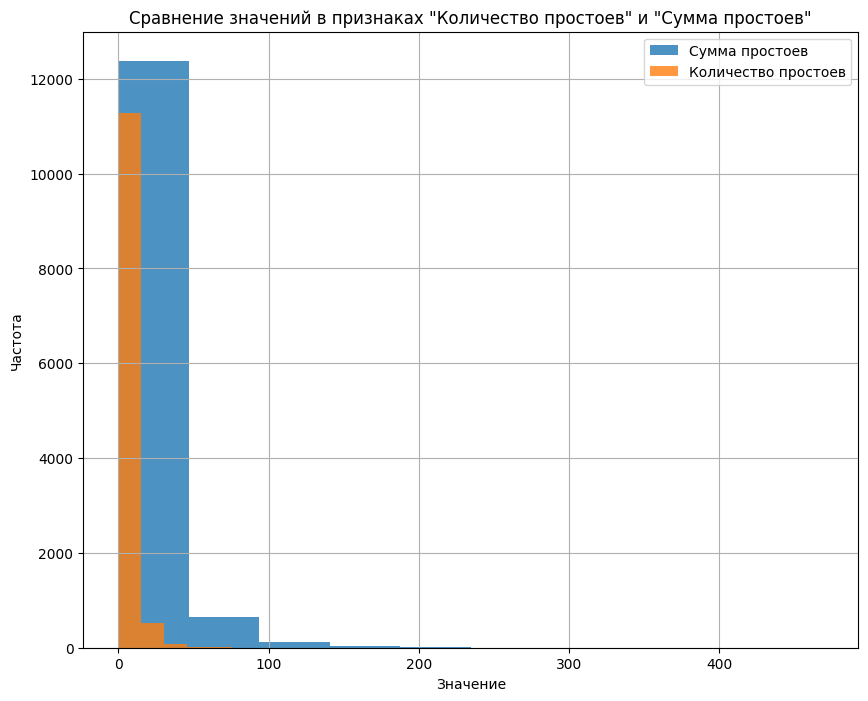

In [1355]:
plt.figure(figsize=(10, 8))
plt.hist(df['Сумма простоев'], label='Сумма простоев', alpha=0.8)
plt.hist(df['Количество простоев'], label='Количество простоев', alpha=0.8)
plt.legend()
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.title('Сравнение значений в признаках "Количество простоев" и "Сумма простоев"')
plt.grid()
plt.show()

Данные имеют одинаковое распределение. Заполним пропущенные значения в количестве простоев с помощью суммы простоев.

In [1356]:
df_clean = df.dropna(subset=['Количество простоев'])
total_k = df_clean['Количество простоев'].sum()
total_p = df_clean['Сумма простоев'].sum()
average_downtime_per_event = total_k / total_p
df['Количество простоев'] = df['Количество простоев'].fillna(
  df['Сумма простоев'] * average_downtime_per_event
)
df = df.drop('Сумма простоев', axis =1)

Заполним информацию о вреемени простоя

In [1357]:
# Вычисляем общий коэффициент для всего датасета
df_clean = df.dropna(subset=['Общее время простоев'])
total_downtime = df_clean['Общее время простоев'].sum()
total_events = df_clean['Количество простоев'].sum()
average_downtime_per_event = total_downtime / total_events
# Заполняем пропущенные значения в "Общее время простоев"
df['Общее время простоев'] = df['Общее время простоев'].fillna(
  df['Количество простоев'] * average_downtime_per_event
)

In [1358]:
df.loc[~df["Общее время простоев"].isna() & (df["Общее время поиска"] < df["Общее время активного поиска"] + df["Общее время простоев"]), "Общее время поиска"] = df["Общее время активного поиска"] + df["Общее время простоев"]
df['Общее время поиска'] = df['Общее время поиска'].fillna(df['Общее время активного поиска'] + df['Общее время простоев'])

Заполним оставшиеся строки датасета

In [1359]:
df['Тип расщелины'] = df['Тип расщелины'].fillna('горизонтальная')
df['Общий путь поиска'] = df['Общий путь поиска'].fillna(df['Общий путь поиска'].median())
df['Глубина первого отвилка'] = df['Глубина первого отвилка'].fillna(df['Глубина первого отвилка'].median())
df['Путь поиска в первом отвилке'] = df['Путь поиска в первом отвилке'].fillna(df['Путь поиска в первом отвилке'].median())

In [1360]:
df.columns

Index(['Наименование королевства', 'Наименование земли', 'Наименование хребта',
       'Наименование расщелины', 'Цель', 'Тип расщелины',
       'Категория расщелины', 'Назначение расщелины', 'Тип отвилка',
       'Количество труб', 'Количество дополнительных отвилков',
       'Количество пилотных отвилков', 'Глубина по отвилку',
       'Глубина первого отвилка', 'Путь поиска в первом отвилке',
       'Общее время поиска', 'Общее время активного поиска',
       'Общее время простоев', 'Количество аварий', 'Количество брака',
       'Количество геологических осложнений', 'Количество осложнений',
       'Количество простоев по метеоусловиям', 'Количество простоев',
       'Количество ремонтов', 'Количество простоев без виновника',
       'Количество простоев по вине королевства',
       'Количество простоев в поиске',
       'Количество простоев в наклонном поиске',
       'Количество простоев по зельям',
       'Количество простоев в контроле поиска',
       'Количество простоев в конце

**Кодирование признаков типа object**

In [1361]:
encoder = LabelEncoder()
encoder.fit(df['Наименование земли'])
df['Наименование земли'] = encoder.transform(df['Наименование земли'])

In [1362]:
encoder = LabelEncoder()
encoder.fit(df['Наименование королевства'])
df['Наименование королевства'] = encoder.transform(df['Наименование королевства'])

In [1363]:
encoder = LabelEncoder()
encoder.fit(df['Наименование хребта'])
df['Наименование хребта'] = encoder.transform(df['Наименование хребта'])

In [1364]:
encoder = LabelEncoder()
encoder.fit(df['Цель'])
df['Цель'] = encoder.transform(df['Цель'])

In [1365]:
encoder = LabelEncoder()
encoder.fit(df['Тип расщелины'])
df['Тип расщелины'] = encoder.transform(df['Тип расщелины'])

In [1366]:
encoder = LabelEncoder()
encoder.fit(df['Тип отвилка'])
df['Тип отвилка'] = encoder.transform(df['Тип отвилка'])

In [1367]:
encoder = LabelEncoder()
encoder.fit(df['Категория расщелины'])
df['Категория расщелины'] = encoder.transform(df['Категория расщелины'])

In [1368]:
encoder = LabelEncoder()
encoder.fit(df['Назначение расщелины'])
df['Назначение расщелины'] = encoder.transform(df['Назначение расщелины'])

**Обучение модели**

Основные метрики при решении задачи регрессии - MAE, MAPE, MSE, RMSE. Ранее были построены графики boxplot, по которым видно, что данные имеют достаточно большое количество выбросов, к которым MSE и RMSE метрики очень чувствительны. Поэтому необходимо рассчитывать качество модели по средней абсолютной ошибке, однако метрика MAE неудобна для интерпретации результатов, поэтому будет использоваться ее аналог, выраженный в процентах - MAPE.

В качестве целевого признака примем "Общее время поиска". Удалим из датасета вспомогательные признаки и информацию о времени поиска.

In [1369]:
columns_to_drop = ['Количество дней', 'Верхнее', 'Среднее',
       'Основное', 'Тупик', 'Пилот', 'Открытая_расщелина', 'Изоляция']
for column in columns_to_drop:
  df = df.drop(column, axis=1)

Создадим функцию, которая будет определять важность признаков

In [1370]:
def feature_importance_regression(X, y):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  scaler = StandardScaler()
  X_train = scaler.fit_transform(X_train)
  X_test = scaler.transform(X_test)
  model = tree.DecisionTreeRegressor(random_state=42)
  model.fit(X_train, y_train)
  importances = model.feature_importances_
  feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
  feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

  return feature_importance

In [1371]:
#отделяем целевую переменную от признаков
y = df['Общее время поиска']
X = df.drop('Общее время поиска', axis =1)

In [1372]:
feature_importance_df = feature_importance_regression(X, y)
feature_importance_df

,Feature,Importance
15,Общее время активного поиска,7.533568e-01
16,Общее время простоев,2.319886e-01
24,Количество простоев без виновника,4.347887e-03
18,Количество брака,2.329505e-03
2,Наименование хребта,1.184515e-03
26,Количество простоев в поиске,8.667007e-04
1,Наименование земли,8.551800e-04
20,Количество осложнений,7.222973e-04
12,Глубина по отвилку,6.264780e-04
3,Наименование расщелины,5.613805e-04


In [1373]:
#Разделение данных на тренировочную и тестовую выборки
X_train, X_test1, y_train, y_test1 = train_test_split(X, y, test_size = 0.2, random_state = 42)
#Разделение тренировочной выборки на тренировочную и валидационную часть
X_test, X_val, y_test, y_val = train_test_split(X_test1, y_test1, test_size = 0.5, random_state = 42)

In [1374]:
scaler = StandardScaler()
#обучение на тренировочной выборке
scaler.fit(X_train)
X_train_sc = scaler.transform(X_train)
X_val_sc = scaler.transform(X_val)
X_test_sc = scaler.transform(X_test)
X_train_sc

array([[-0.07076243,  0.672377  ,  0.88509283, ..., -0.13416033,
         0.41685928, -0.47185432],
       [-1.72869695,  1.83342233, -0.83386388, ..., -0.01404326,
         0.41685928,  0.17561795],
       [-0.07076243, -0.51446935, -1.04051442, ...,  2.02174374,
         0.41685928,  0.17561795],
       ...,
       [-0.07076243,  0.672377  ,  1.07295696, ..., -0.10934741,
        -1.41333082,  0.17561795],
       [ 1.25558519,  0.18215785,  0.89448604, ..., -1.57161769,
        -1.41333082, -1.76679885],
       [ 1.25558519, -1.26269857, -0.87613331, ...,  0.41849099,
        -1.41333082,  0.17561795]])

In [1375]:
forest_model = RandomForestRegressor(n_estimators = 100, min_samples_leaf = 3, random_state = 11)
forest_model.fit(X_train_sc, y_train)
pred_train = forest_model.predict(X_train_sc)
pred_val = forest_model.predict(X_val_sc)
print('MAPE на тренировочной выборке:', mean_absolute_percentage_error(pred_train, y_train))
print('MAPE на валидационной выборке:', mean_absolute_percentage_error(pred_val, y_val))
forest_MAPE = mean_absolute_percentage_error(pred_val, y_val)

MAPE на тренировочной выборке: 0.008625274621007194
MAPE на валидационной выборке: 0.01743988391660444


После применения функции видно, что данные о количестве простоев оказывают существенное влияние на модель, однако, необходимо построить модель, которая будет предсказывать сроки поиска до начала похода. Таким образом точные данные о времени и количестве простоев не будут известны заранее. Следовательно, необходимо построить модель без использования этих данных напрямую, а лишь обобщая древние знания краснолюдов.  
Удалим признаки связанные с количеством простоев.

In [1376]:
df.columns

Index(['Наименование королевства', 'Наименование земли', 'Наименование хребта',
       'Наименование расщелины', 'Цель', 'Тип расщелины',
       'Категория расщелины', 'Назначение расщелины', 'Тип отвилка',
       'Количество труб', 'Количество дополнительных отвилков',
       'Количество пилотных отвилков', 'Глубина по отвилку',
       'Глубина первого отвилка', 'Путь поиска в первом отвилке',
       'Общее время поиска', 'Общее время активного поиска',
       'Общее время простоев', 'Количество аварий', 'Количество брака',
       'Количество геологических осложнений', 'Количество осложнений',
       'Количество простоев по метеоусловиям', 'Количество простоев',
       'Количество ремонтов', 'Количество простоев без виновника',
       'Количество простоев по вине королевства',
       'Количество простоев в поиске',
       'Количество простоев в наклонном поиске',
       'Количество простоев по зельям',
       'Количество простоев в контроле поиска',
       'Количество простоев в конце

На основе признаков, которые необходимо удалить, создадим новые, которые будут отражать средние показатели, полученные из древних знаний

In [1377]:
df['Среднее количество аварий в расщелине'] = df['Наименование расщелины'].map(
  df.groupby(by = 'Наименование расщелины')[['Количество аварий']].agg('median')['Количество аварий']
)
df['Среднее время простоев в расщелине'] = df['Наименование расщелины'].map(
  df.groupby(by = 'Наименование расщелины')[['Общее время простоев']].agg('median')['Общее время простоев']
)
df['Среднее время активного поиска в расщелине'] = df['Наименование расщелины'].map(
  df.groupby(by = 'Наименование расщелины')[['Общее время активного поиска']].agg('median')['Общее время активного поиска']
)
df['Среднее количество простоев в поиске'] = df['Глубина по отвилку'].map(
  df.groupby(by = 'Глубина по отвилку')[['Количество простоев в поиске']].agg('median')['Количество простоев в поиске']
)
df['Среднее количество простоев'] = df['Тип расщелины'].map(
  df.groupby(by = 'Тип расщелины')[['Количество простоев']].agg('median')['Количество простоев']
)
df['Среднее количество ремонтов'] = df['Глубина по отвилку'].map(
  df.groupby(by = 'Глубина по отвилку')[['Количество ремонтов']].agg('median')['Количество ремонтов']
)
df['Среднее количество брака'] = df['Глубина по отвилку'].map(
  df.groupby(by = 'Глубина по отвилку')[['Количество брака']].agg('median')['Количество брака']
)
df['Среднее количество простоев без виновника'] = df['Общий путь поиска'].map(
  df.groupby(by = 'Общий путь поиска')[['Количество простоев без виновника']].agg('median')['Количество простоев без виновника']
)
df['Среднее количество простоев по метеоусловиям'] = df['Наименование земли'].map(
  df.groupby(by = 'Наименование земли')[['Количество простоев по метеоусловиям']].agg('median')['Количество простоев по метеоусловиям']
)
df['Среднее количество простоев в наклонном поиске'] = df['Тип расщелины'].map(
  df.groupby(by = 'Тип расщелины')[['Количество простоев в наклонном поиске']].agg('median')['Количество простоев в наклонном поиске']
)
df['Количество отвилков'] = df['Количество пилотных отвилков'] + df['Количество дополнительных отвилков']

Предполагается, что данные об отвилках, расщелинах, пути, количестве труб мы берем из карты краснолюдов

In [1378]:
columns_to_drop = ['Количество аварий', 'Количество брака',
       'Количество геологических осложнений', 'Количество осложнений',
       'Количество простоев по метеоусловиям', 'Количество простоев',
       'Количество ремонтов', 'Количество простоев без виновника',
       'Количество простоев по вине королевства',
       'Количество простоев в поиске',
       'Количество простоев в наклонном поиске',
       'Количество простоев по зельям',
       'Количество простоев в контроле поиска',
       'Количество простоев в конце расщелины',
       'Количество простоев по долбилам',
       'Количество простоев по вине исследователей',
       'Количество простоев по креплениям', 'Количество простоев (прочие)', 'Общее время активного поиска', 'Общее время простоев', 'Количество дополнительных отвилков', 'Количество пилотных отвилков']
for column in columns_to_drop:
  df = df.drop(column, axis=1)

<Axes: >

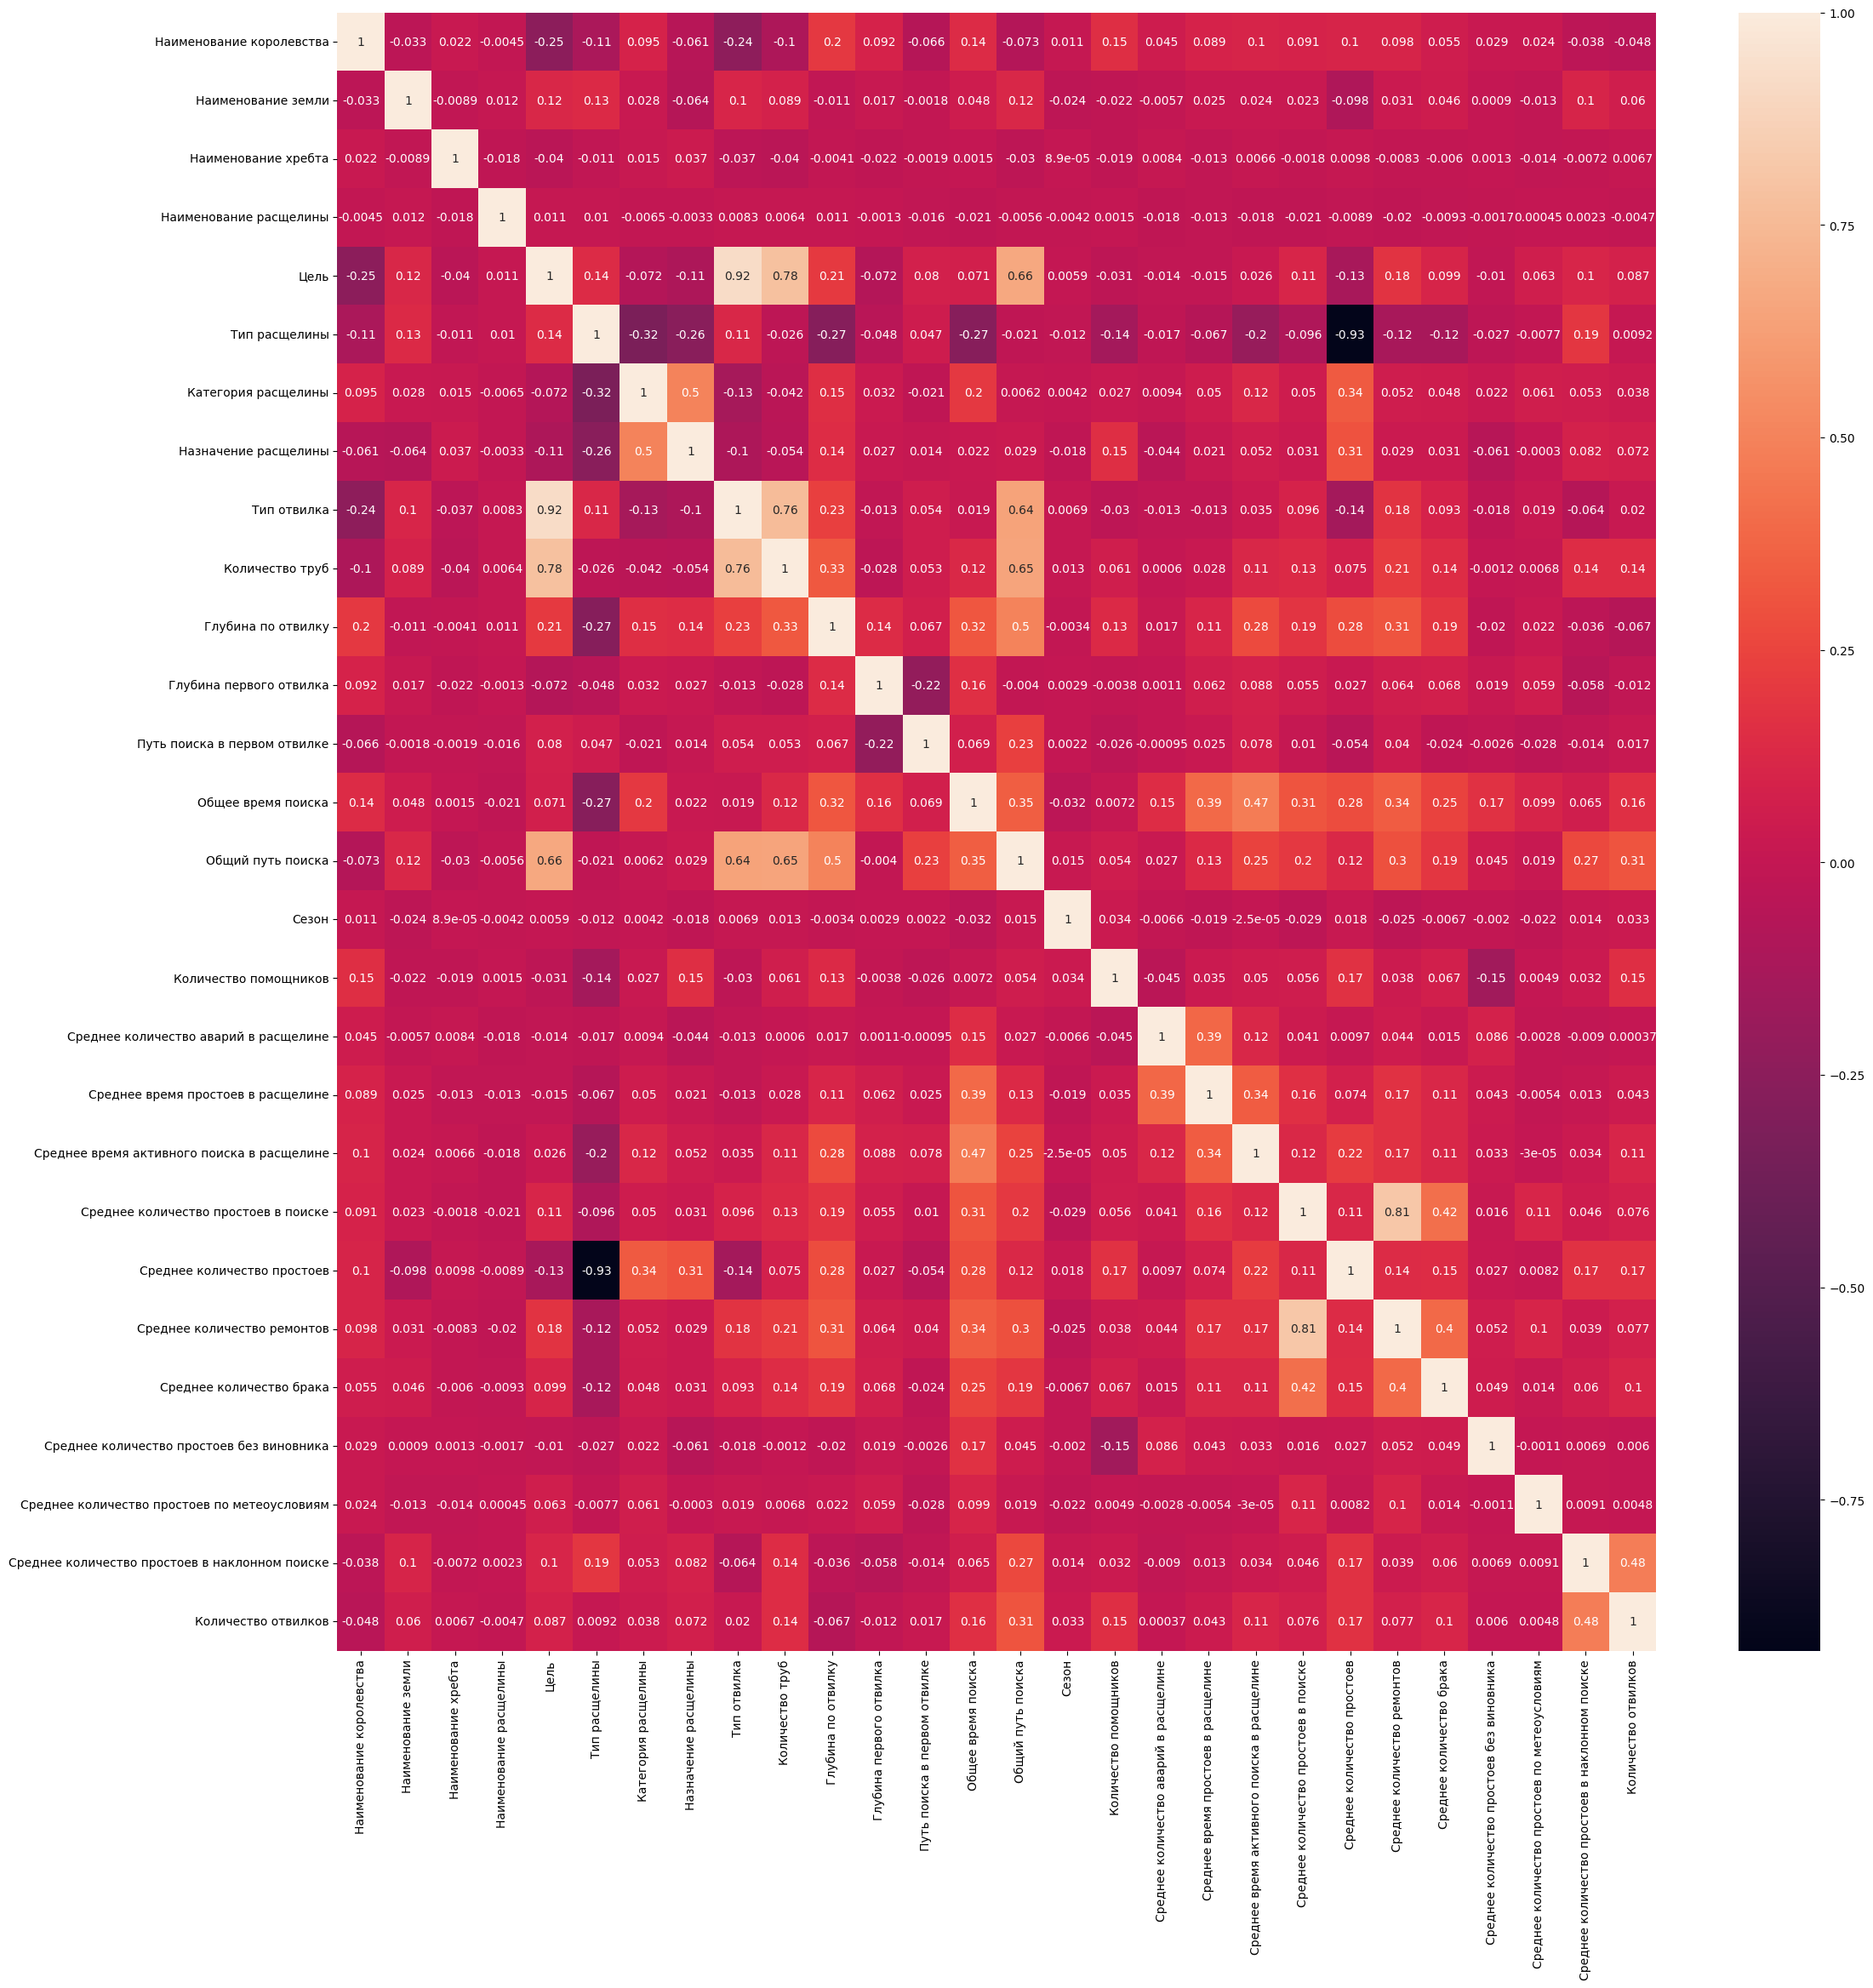

In [1379]:
df_count = df.select_dtypes(['float', 'int'])
df_count_matrix = df_count.corr()
plt.figure(figsize=(25,25))
sns.heatmap(df_count_matrix, annot = True)

Реализуем обучение вновь

In [1380]:
y = df['Общее время поиска']
X = df.drop('Общее время поиска', axis =1)

In [1381]:
feature_importance_df = feature_importance_regression(X, y)
feature_importance_df

,Feature,Importance
13,Общий путь поиска,0.230903
18,Среднее время активного поиска в расщелине,0.108395
17,Среднее время простоев в расщелине,0.103701
4,Цель,0.070367
10,Глубина по отвилку,0.064540
20,Среднее количество простоев,0.050332
1,Наименование земли,0.045216
19,Среднее количество простоев в поиске,0.043945
2,Наименование хребта,0.037632
3,Наименование расщелины,0.035537


Из функции важности признаков видно, что новые сформированные признаки имеют существенную роль в улучшении качества модели

In [1382]:
#Разделение данных на тренировочную и тестовую выборки
X_train, X_test1, y_train, y_test1 = train_test_split(X, y, test_size = 0.2, random_state = 42)
#Разделение тренировочной выборки на тренировочную и валидационную часть
X_test, X_val, y_test, y_val = train_test_split(X_test1, y_test1, test_size = 0.5, random_state = 42)

In [1383]:
scaler = StandardScaler()
#обучение на тренировочной выборке
scaler.fit(X_train)
X_train_sc = scaler.transform(X_train)
X_val_sc = scaler.transform(X_val)
X_test_sc = scaler.transform(X_test)
X_train_sc

array([[-0.07076243,  0.672377  ,  0.88509283, ..., -0.02783592,
        -0.32434084, -0.49154941],
       [-1.72869695,  1.83342233, -0.83386388, ..., -0.02783592,
        -0.32434084, -0.49154941],
       [-0.07076243, -0.51446935, -1.04051442, ..., -0.02783592,
        -0.32434084, -0.49154941],
       ...,
       [-0.07076243,  0.672377  ,  1.07295696, ..., -0.02783592,
        -0.32434084, -0.49154941],
       [ 1.25558519,  0.18215785,  0.89448604, ..., -0.02783592,
        -0.32434084, -0.49154941],
       [ 1.25558519, -1.26269857, -0.87613331, ..., -0.02783592,
        -0.32434084, -0.49154941]])

**Дамми-модель**

In [1384]:
#построение dummy-модели
dummy_model = DummyRegressor(strategy="mean")

dummy_model.fit(X_train, y_train)

# Делаем предсказания
y_pred = dummy_model.predict(X_val_sc)

# Вычисляем среднеквадратичную ошибку
dummy_MAPE = mean_absolute_percentage_error(y_val, y_pred)
dummy_MAPE

0.5563712333663038

**Модель линейной регрессии**

In [1385]:
lr_model=linear_model.LinearRegression()
lr_model.fit(X_train, y_train)
y_lr_pred=lr_model.predict(X_val)
lr_MAPE = mean_absolute_percentage_error(y_val, y_lr_pred)
lr_MAPE

0.3123857390087226

**Дерево решений**

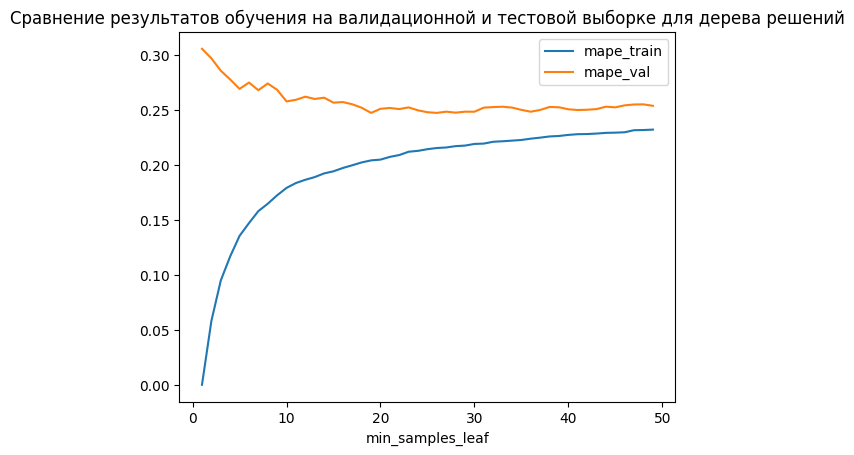

In [1386]:
result =[]
for i in range (1, 50):
      tree_model = tree.DecisionTreeRegressor (min_samples_leaf = i, random_state = 11)
      tree_model.fit(X_train_sc, y_train)
      pred_train = tree_model.predict(X_train_sc)
      pred_val = tree_model.predict(X_val_sc)

      result.append([i, mean_absolute_percentage_error(pred_train, y_train), mean_absolute_percentage_error(pred_val, y_val)])
result_pd = pd.DataFrame(result, columns = ['min_samples_leaf', 'mape_train','mape_val'])
result_pd.set_index('min_samples_leaf')['mape_train'].plot(label = 'mape_train', title= ('Сравнение результатов обучения на валидационной и тестовой выборке для дерева решений'))
result_pd.set_index('min_samples_leaf')['mape_val'].plot(label = 'mape_val')
plt.legend()

In [1387]:
tree_MAPE = result_pd[result_pd['mape_val'] == result_pd['mape_val'].min()]
tree_MAPE

,min_samples_leaf,mape_train,mape_val
18,19,0.203981,0.247129


**Случайный лес**

In [1388]:
forest_model = RandomForestRegressor(n_estimators = 150, min_samples_leaf = 3, random_state = 11)
forest_model.fit(X_train_sc, y_train)
pred_train = forest_model.predict(X_train_sc)
pred_val = forest_model.predict(X_val_sc)
print('MAPE на тренировочной выборке:', mean_absolute_percentage_error(pred_train, y_train))
print('MAPE на валидационной выборке:', mean_absolute_percentage_error(pred_val, y_val))
forest_MAPE = mean_absolute_percentage_error(pred_val, y_val)

MAPE на тренировочной выборке: 0.10921377412155042
MAPE на валидационной выборке: 0.2096879632730611


**Градиентный бустинг**

[0]	validation_0-mape:0.52736	validation_1-mape:0.52826
[1]	validation_0-mape:0.50383	validation_1-mape:0.50433
[2]	validation_0-mape:0.48287	validation_1-mape:0.48345
[3]	validation_0-mape:0.46322	validation_1-mape:0.46420
[4]	validation_0-mape:0.44640	validation_1-mape:0.44823
[5]	validation_0-mape:0.43068	validation_1-mape:0.43327
[6]	validation_0-mape:0.41709	validation_1-mape:0.41931
[7]	validation_0-mape:0.40363	validation_1-mape:0.40664
[8]	validation_0-mape:0.39114	validation_1-mape:0.39440
[9]	validation_0-mape:0.37775	validation_1-mape:0.38137
[10]	validation_0-mape:0.36723	validation_1-mape:0.37114
[11]	validation_0-mape:0.35816	validation_1-mape:0.36250
[12]	validation_0-mape:0.34924	validation_1-mape:0.35467
[13]	validation_0-mape:0.34215	validation_1-mape:0.34804
[14]	validation_0-mape:0.33457	validation_1-mape:0.34109
[15]	validation_0-mape:0.32686	validation_1-mape:0.33389
[16]	validation_0-mape:0.32076	validation_1-mape:0.32822
[17]	validation_0-mape:0.31511	validation

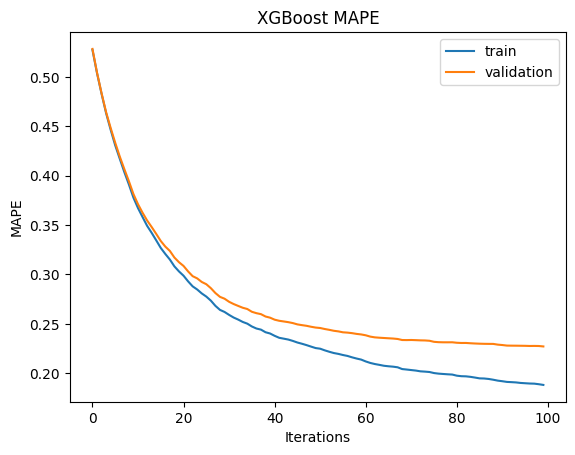

In [1389]:
XGB_model = XGBRegressor(n_estimators = 100, learning_rate = 0.09, eval_metric = 'mape')
XGB_model.fit(X_train_sc, y_train, eval_set = [(X_train_sc, y_train), (X_val_sc, y_val)])
train_XGB_pred = XGB_model.predict(X_train_sc)
val_XGB_pred = XGB_model.predict(X_val_sc)
epochs = len(XGB_model.evals_result()['validation_0']['mape'])
x_axis = range(0, epochs)
fig, ax = plt.subplots()
ax.plot(x_axis, XGB_model.evals_result()['validation_0']['mape'], label = 'train')
ax.plot(x_axis, XGB_model.evals_result()['validation_1']['mape'], label = 'validation')

plt.title('XGBoost MAPE')
plt.xlabel('Iterations')
plt.ylabel('MAPE')
plt.legend()

**ИТОГОВАЯ МОДЕЛЬ**

Наилучшей метрики MAPE на валидационной выборке получилось добиться с помощью модели случайного леса. Гиперпараметры модели: количество деревьев в ансамбле - 150, минимальное количество объектов в листьях - 3

In [1391]:
pred_test = forest_model.predict(X_test_sc)
print('Значение MAPE для случайного леса на тестовой выборке:', mean_absolute_percentage_error(pred_test, y_test))

Значение MAPE для случайного леса на тестовой выборке: 0.19624618100636565
